In [465]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [466]:
import genome_model
from importlib import reload
reload(genome_model)
fit_model = genome_model.fit_model
get_model = genome_model.get_model
normal = genome_model.normal
simple_model = genome_model.simple_model

In [479]:
def get_error(row, a, mu, sigma):
    mu_ceil = np.round(mu).astype(int)
    ntcard = row[:mu_ceil+1] # From f1 to mu_ceil
    total_kmers = np.sum(row)
    error = 0
    for x, val in enumerate(ntcard):
        model_val = simple_model(x, a, mu, sigma)
        if val > model_val:
            error += val - model_val
    return error/total_kmers

In [468]:
def get_repeat(row, a, mu, sigma):
    mu_ceil = np.round(mu).astype(int)
    ntcard = row[mu_ceil: ] # From mu_ceil to f400
    total_kmers = np.sum(row)
    repeat = 0
    for x, val in enumerate(ntcard):
        # print(x+mu_ceil, val)
        model_val = simple_model(x+mu_ceil, a, mu, sigma)
        if val > model_val:
            repeat += val - model_val
    return repeat/total_kmers

In [469]:
human_ntcard = pd.read_csv('/Users/emreerhan/kmer-optimization/Data/ntcard/human/hg38_40x_e.tsv', sep='\t', index_col=0)

In [470]:
xdata = np.arange(1, 401, 1)
human_records = human_ntcard.loc[:, 'f1':'f400'].apply(lambda row: get_model(xdata, row.values, model_type='simple', error_dist=True), axis=1)

first minima:  1 mode:  6
first minima:  10 mode:  32
first minima:  9 mode:  28
first minima:  7 mode:  24
first minima:  5 mode:  21
first minima:  4 mode:  18
first minima:  3 mode:  15
first minima:  2 mode:  12
first minima:  2 mode:  9


In [471]:
human_data = pd.DataFrame.from_records(human_records.values.tolist(),
                                          columns=['N1', 'mu', 'sigma'],
                                          index=human_records.index)

In [472]:
human_data = human_data.join(human_ntcard)

In [473]:
human_data['ceil_mu'] = np.ceil(human_data['mu']).astype(int)

In [480]:
human_data['error_content'] = human_data.apply(lambda row: get_error(row['f1':'f400'].values, row['N1'], row['mu'], row['sigma']), axis=1)

In [481]:
human_data['repeat_content'] = human_data.apply(lambda row: get_repeat(row['f1':'f400'].values, row['N1'], row['mu'], row['sigma']), axis=1)

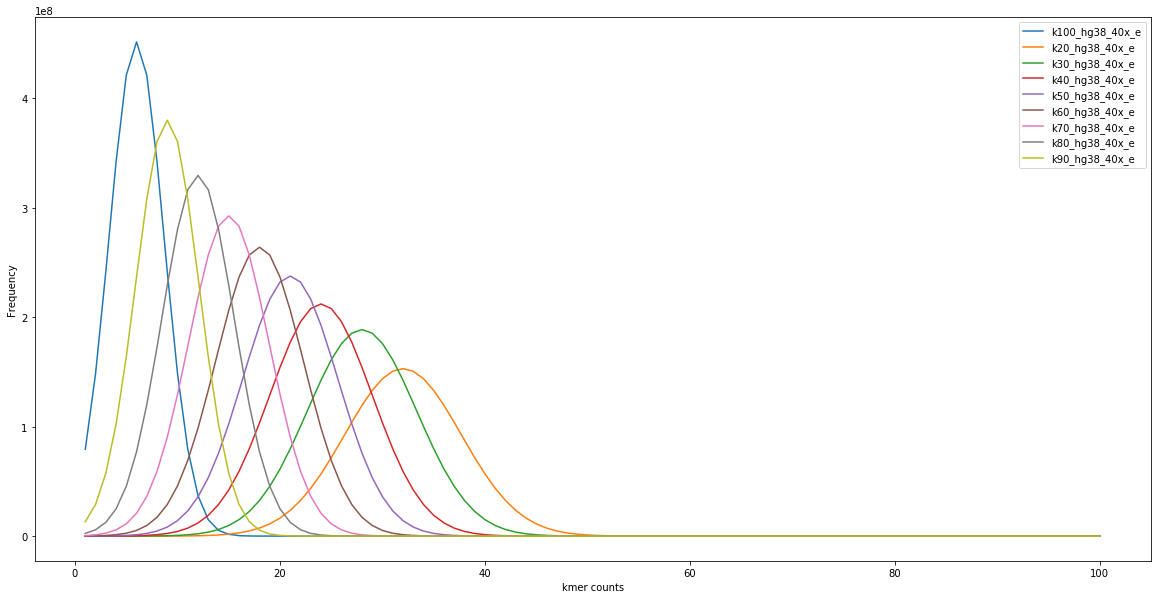

In [482]:
ydatas = human_ntcard.loc[:, 'f1': 'f400']
xdata = np.arange(1, 401, dtype=int)
best_vals = human_data.loc[:, ['N1', 'mu', 'sigma']]
plt.figure(figsize=(20,10))

for (idx1, ydata), (idx2, best_val) in zip(ydatas.iterrows(), best_vals.iterrows()):
    plt.plot(xdata[0:100], simple_model(xdata, *best_val)[0:100], '-', label='{}'.format(idx1))
    # plt.plot(xdata[0:100], ydata[0:100], '.', label='empirical')
plt.legend()
plt.xlabel('kmer counts')
plt.ylabel('Frequency')
plt.show()

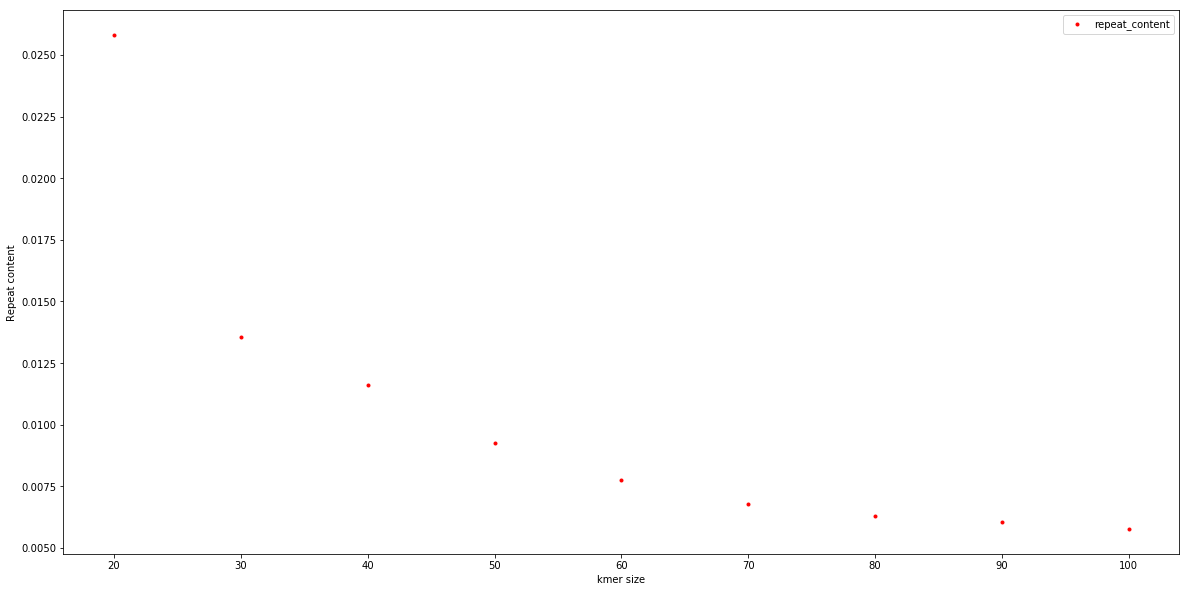

In [483]:
ydata = human_data['repeat_content']
xdata = human_data['k']
plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'r.')
plt.legend()
plt.xlabel('kmer size')
plt.ylabel('Repeat content')
plt.show()
# plt.savefig('Repeat content.png')

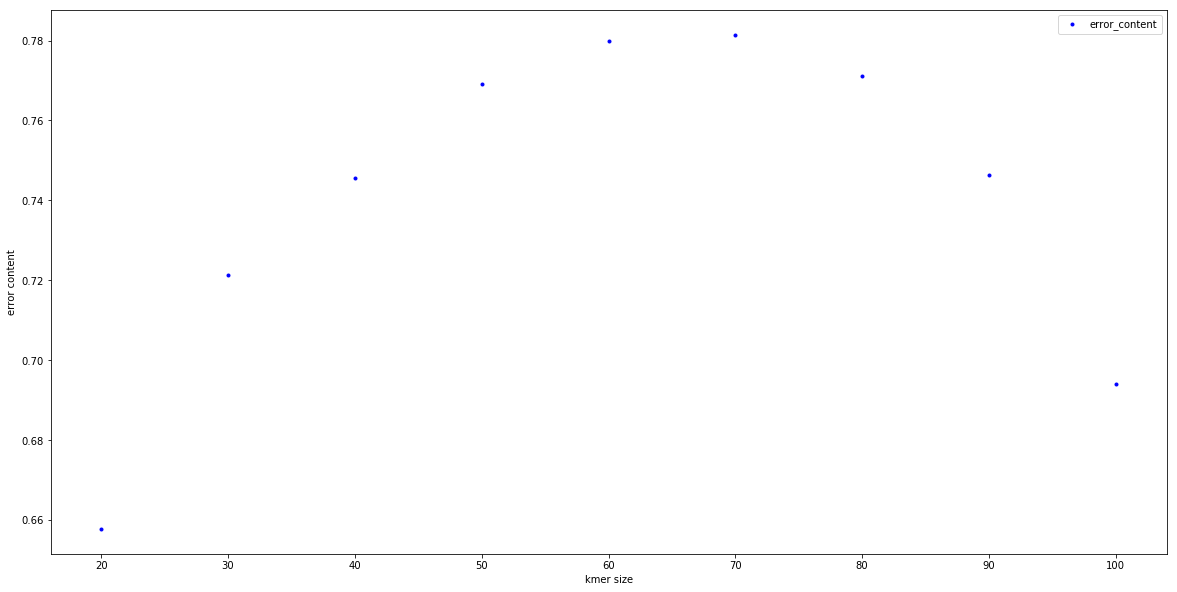

In [484]:
ydata = human_data['error_content']
xdata = human_data['k']
plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'b.')
plt.legend()
plt.xlabel('kmer size')
plt.ylabel('error content')
plt.show()
# plt.savefig('Error content.png')

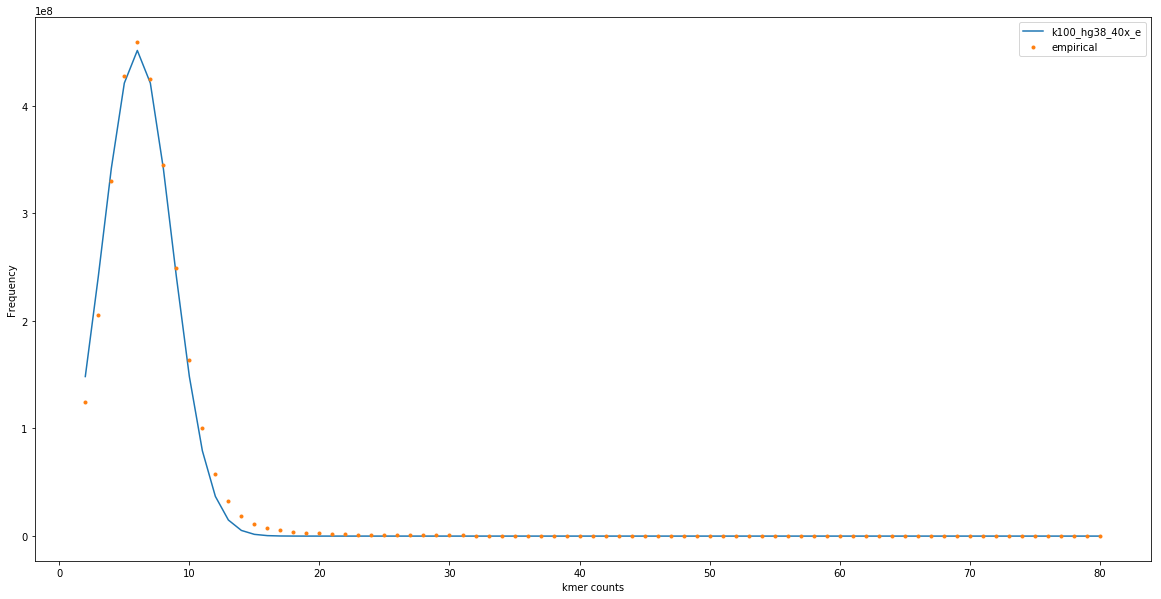

In [464]:
sample = 'k100_hg38_40x_e'
ydata = human_ntcard.loc[sample, 'f1': 'f400']
xdata = np.arange(1, 401, dtype=int)
best_val = human_data.loc[sample, ['N1', 'mu', 'sigma']]
plt.figure(figsize=(20,10))
plt.plot(xdata[1:80], simple_model(xdata, *best_val)[1:80], '-', label=sample)
plt.plot(xdata[1:80], ydata[1:80], '.', label='empirical')
plt.legend()
plt.xlabel('kmer counts')
plt.ylabel('Frequency')
plt.show()
# plt.savefig('k60_fit.png')

In [459]:
get_model(xdata, ydata.values, model_type="simple", error_dist=True)

first minima:  7 mode:  24


(106128098.2758249, 24.000239999999998, 0.19973814682472915)

In [460]:
sample = 'k20_hg38_40x_e'

ydata = human_ntcard.loc[sample, 'f1': 'f400'].values
xdata = np.arange(1, 401, dtype=int)
mu = human_data.loc[sample, 'mu']
first_minima = argrelextrema(ydata, np.less)[0][0]
first_maxima = argrelextrema(ydata[first_minima:], np.greater)[0][0] + first_minima + 1

In [413]:
first_maxima, mu

(6, 6.0000599999999995)